In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nexus-by-djs-nsdc-ultraceuticals/sample_submission.csv
/kaggle/input/nexus-by-djs-nsdc-ultraceuticals/train.csv
/kaggle/input/nexus-by-djs-nsdc-ultraceuticals/test.csv


# Preprocessing

In [2]:
import pandas as pd
data = pd.read_csv('/kaggle/input/nexus-by-djs-nsdc-ultraceuticals/train.csv')
data.head()
# print("Done")

,ID,TargetID,DRUGID,DRUGTYPE,Drug_high_status,DRUGNAME,PUBCHCID,Disease_of_highest_status,Drug_Status,UNIPROID,TARGNAME,GENENAME,SYNONYMS,FUNCTION,BIOCLASS,SEQUENCE,Disease,Accession Number,Target_Status
0,140736,T51115,D0L4YD,Small molecular drug,Approved,Solifenacin,154059,Overactive bladder,Approved,CAC1C_HUMAN,Voltage-gated calcium channel alpha Cav1.2 (CA...,CACNA1C,Voltage-gated calcium channel subunit alpha Ca...,Mediates influx of calcium ions into the cytop...,Voltage-gated ion channel,MVNENTRMYIPEENHQGSNYGSPRPAHANMNANAAAGLAPEHIPTP...,Genetic cardiac arrhythmia,Q13936,Terminated
1,133048,T60529,D03NMM,Small molecular drug,Investigative,AM-643,46843035,Dermatological disease,Investigative,PGH1_HUMAN,Prostaglandin G/H synthase 1 (COX-1),PTGS1,Prostaglandin-endoperoxide synthase 1; Prostag...,Converts arachidonate to prostaglandin H2 (PGH...,Paired donor oxygen oxidoreductase,MSRSLLLWFLLFLLLLPPLPVLLADPGAPTPVNPCCYYPCQHQGIC...,Rheumatoid arthritis,P23219,Approved
2,60493,T80975,D0T2ER,Small molecular drug,Phase 1,TAK-593,24767976,Solid tumour/cancer,Phase 1,VGFR2_HUMAN,Vascular endothelial growth factor receptor 2 ...,KDR,VEGFR2; VEGFR-2; VEGF-2 receptor; Protein-tyro...,Plays an essential role in the regulation of a...,Kinase,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,Renal cell carcinoma,P35968,Approved
3,169176,T92072,D07ESH,Small molecular drug,Discontinued in Phase 3,PF-1913539,176408,Alzheimer disease,Discontinued in Phase 3,AA1R_HUMAN,Adenosine A1 receptor (ADORA1),ADORA1,Adenosine receptor A1; A(1) adenosine receptor,The activity of this receptor is mediated by G...,GPCR rhodopsin,MPPSISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,Hyper-lipoproteinaemia,P30542,Phase 2
4,120183,T30082,D0Q0RC,Small molecular drug,Approved,Ethopropazine,3290,Parkinson disease,Approved,ACES_HUMAN,Acetylcholinesterase (AChE),ACHE,YT; N-ACHE; ARACHE,Role in neuronal apoptosis. Terminates signal ...,Carboxylic ester hydrolase,MRPPQCLLHTPSLASPLLLLLLWLLGGGVGAEGREDAELLVTVRGG...,Oesophageal/gastroduodenal disorder,P22303,Approved


In [3]:
le_cols = []
for col in data.columns:
    if col=='ID' or col=='Target_Status':
        pass
    else : 
        le_cols.append(col)
le_cols

['TargetID',
 'DRUGID',
 'DRUGTYPE',
 'Drug_high_status',
 'DRUGNAME',
 'PUBCHCID',
 'Disease_of_highest_status',
 'Drug_Status',
 'UNIPROID',
 'TARGNAME',
 'GENENAME',
 'SYNONYMS',
 'FUNCTION',
 'BIOCLASS',
 'SEQUENCE',
 'Disease',
 'Accession Number']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Target_Status', axis=1), data['Target_Status'],
                                                    stratify=data['Target_Status'], random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100864, 18) (33622, 18) (100864,) (33622,)


In [5]:
from sklearn.preprocessing import LabelEncoder

for col in le_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = X_test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1 if pd.notna(x) else -1)
    print("Done for", col)

Done for TargetID
Done for DRUGID
Done for DRUGTYPE
Done for Drug_high_status
Done for DRUGNAME
Done for PUBCHCID
Done for Disease_of_highest_status
Done for Drug_Status
Done for UNIPROID
Done for TARGNAME
Done for GENENAME
Done for SYNONYMS
Done for FUNCTION
Done for BIOCLASS
Done for SEQUENCE
Done for Disease
Done for Accession Number


In [6]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print(le.classes_)

['Application submitted' 'Approved' 'Approved (orphan drug)'
 'BLA submitted' 'Clinical trial' 'Discontinued in Phase 1'
 'Discontinued in Phase 1/2' 'Discontinued in Phase 2'
 'Discontinued in Phase 2/3' 'Discontinued in Phase 2b'
 'Discontinued in Phase 3' 'Discontinued in Phase 4'
 'Discontinued in Preregistration' 'IND submitted' 'Investigative'
 'Patented' 'Phase 0' 'Phase 1' 'Phase 1/2' 'Phase 1/2a' 'Phase 1b'
 'Phase 1b/2a' 'Phase 2' 'Phase 2/3' 'Phase 2a' 'Phase 2b' 'Phase 3'
 'Phase 4' 'Preclinical' 'Preregistration' 'Registered' 'Terminated'
 'Withdrawn from market']


In [7]:
# from xgboost import XGBClassifier
# from sklearn.metrics import f1_score, accuracy_score

# print("Model 1: ")
# param1 = {'use_label_encoder': False, 'eval_metric': 'mlogloss'} # 0.94986
# model1 = XGBClassifier(**param1)
# model1.fit(X_train, y_train)
# pred1 = model1.predict(X_test)
# print(accuracy_score(y_test, pred1))
# print(f1_score(y_test, pred1, average='weighted'))
# print('*'*25)

# print("Model 2: ")
# param2 = {'max_depth': 10, 'learning_rate': 0.09887667319531757, 'n_estimators': 286,
#          'subsample': 0.8818473315577697, 'colsample_bytree': 0.7911835582470869, 
#          'gamma': 0.5882283567417588, 'min_child_weight': 1} #  0.96608
# model2 = XGBClassifier(**param2)
# model2.fit(X_train, y_train)
# pred2 = model2.predict(X_test)
# print(accuracy_score(y_test, pred2))
# print(f1_score(y_test, pred2, average='weighted'))
# print('*'*25)

# print("Model 3: ")
# param3 = {'max_depth': 17, 'learning_rate': 0.0663028870385258, 'n_estimators': 409,
#           'subsample': 0.9629463287306949, 'colsample_bytree': 0.8300614936416831,
#           'gamma': 0.2857062337129327, 'min_child_weight': 3} # 4th submission - 0.96506
# model3 = XGBClassifier(**param3)
# model3.fit(X_train, y_train)
# pred3 = model3.predict(X_test)
# print(accuracy_score(y_test, pred3))
# print(f1_score(y_test, pred3, average='weighted'))
# print('*'*25)

# print("Model 4: ")
# param4 = {'max_depth': 18, 'learning_rate': 0.02554741000702669, 'n_estimators': 418, 
#           'subsample': 0.9899632082718985, 'colsample_bytree': 0.8226626583591214, 
#           'gamma': 0.9701683008405076, 'min_child_weight': 3}  # 0.965149
# model4 = XGBClassifier(**param4)
# model4.fit(X_train, y_train)
# pred4 = model4.predict(X_test)
# print(accuracy_score(y_test, pred4))
# print(f1_score(y_test, pred4, average='weighted'))

In [8]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import xgboost as xgb

# # Function to plot feature importances as percentages with annotations
# def plot_feature_importance(model, model_name):
#     plt.figure(figsize=(6, 10))
    
#     # Get feature importances
#     importance = model.feature_importances_
    
#     # Convert to percentages
#     importance_percentages = importance / importance.sum() * 100
    
#     # Create a DataFrame for easy plotting
#     importance_df = pd.DataFrame({'Feature': model.get_booster().feature_names, 'Importance (%)': importance_percentages})
    
#     # Sort the DataFrame by importance
#     importance_df = importance_df.sort_values(by='Importance (%)', ascending=False)
    
#     # Plot the feature importances
#     plt.barh(importance_df['Feature'][:20], importance_df['Importance (%)'][:33], color='skyblue')
#     plt.xlabel('Importance (%)')
#     plt.title(f'Feature Importances for {model_name}')
#     plt.xlim(0, 100)  # Limit x-axis to 100%
#     plt.gca().invert_yaxis()  # Invert y-axis for better readability
    
#     # Annotate each bar with the importance percentage
#     for index, value in enumerate(importance_df['Importance (%)'][:33]):
#         plt.text(value + 1, index, f'{value:.2f}%', va='center')  # Add a slight offset for better visibility

#     plt.show()

# # Plot feature importances for each model
# plot_feature_importance(model1, 'Model 1')
# plot_feature_importance(model2, 'Model 2')
# plot_feature_importance(model3, 'Model 3')
# plot_feature_importance(model4, 'Model 4')

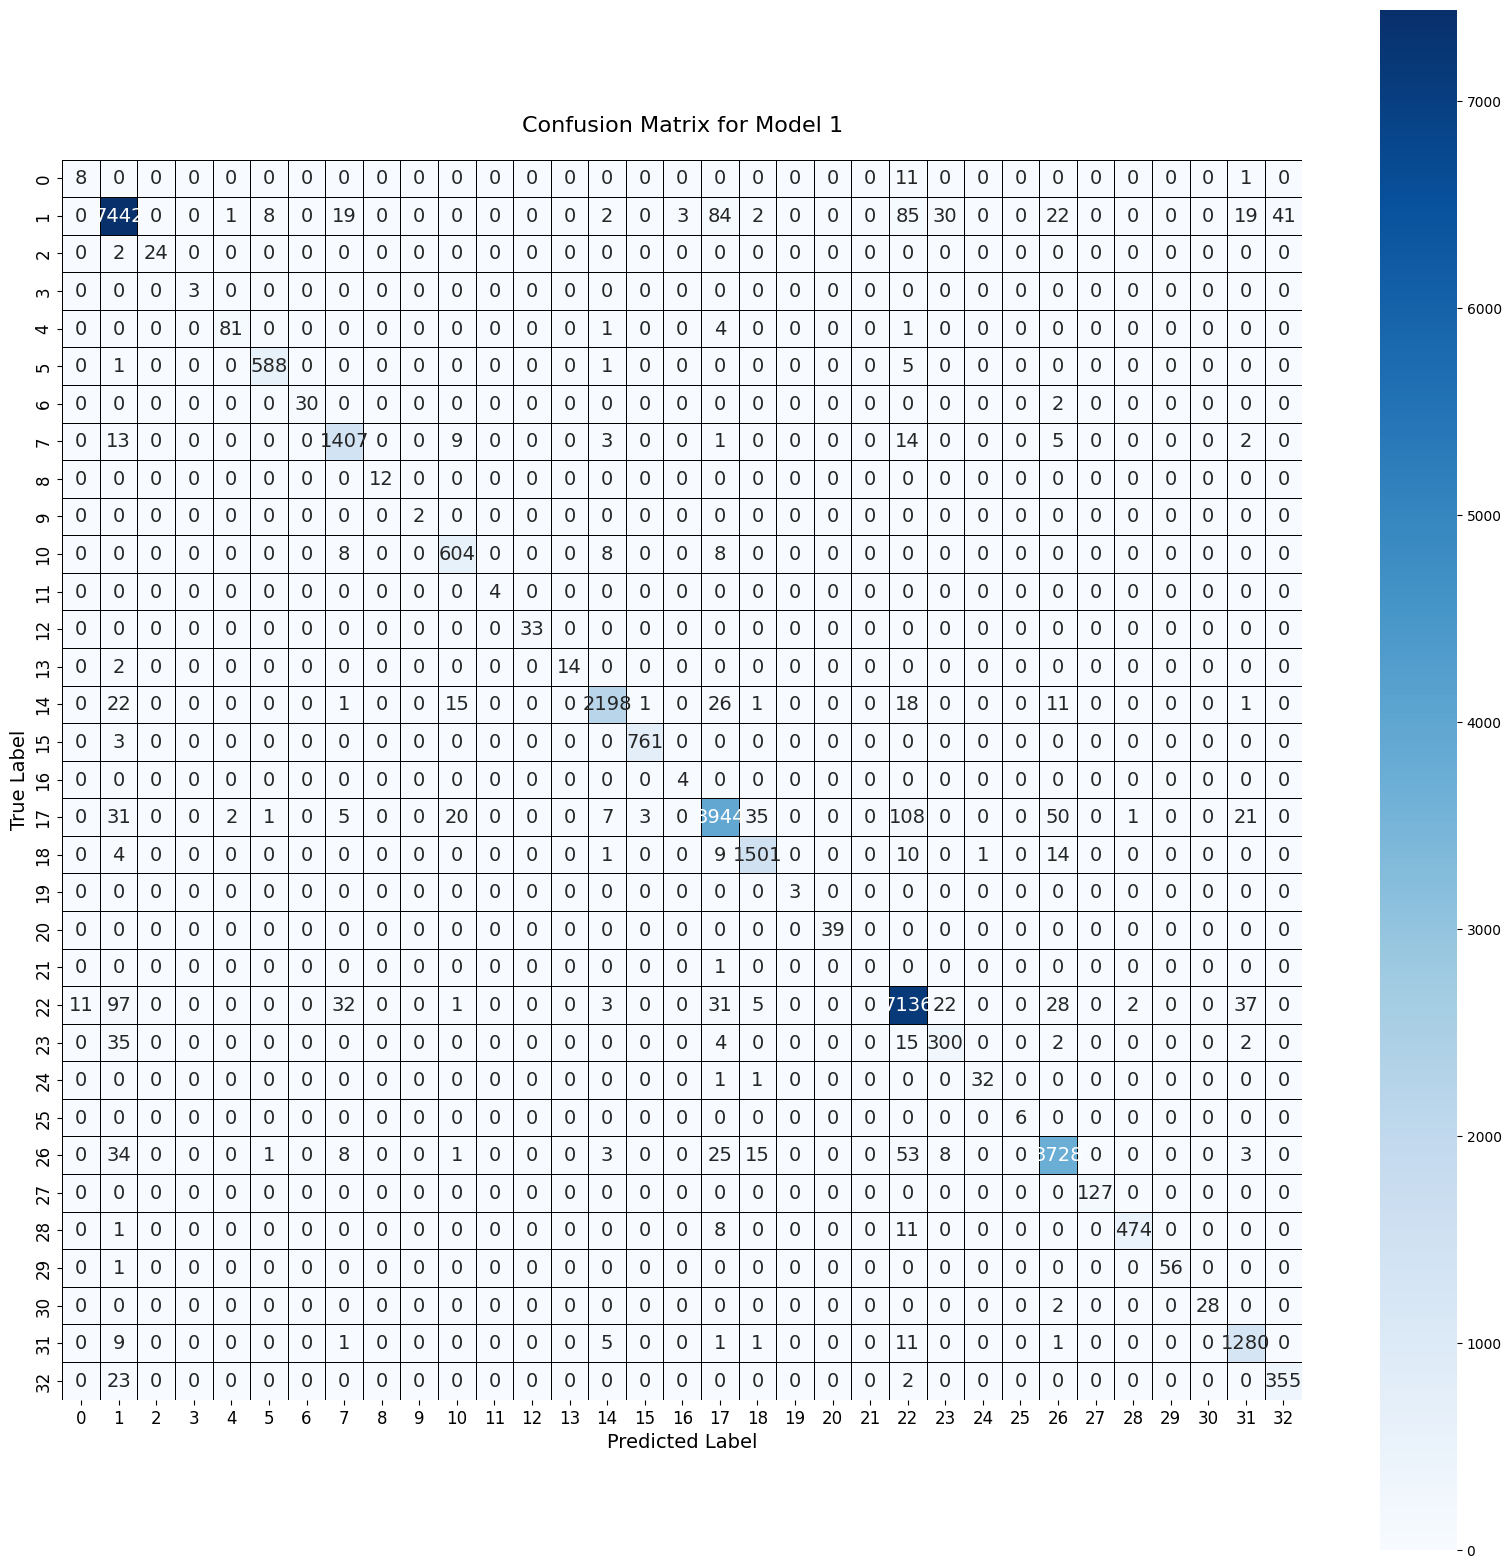

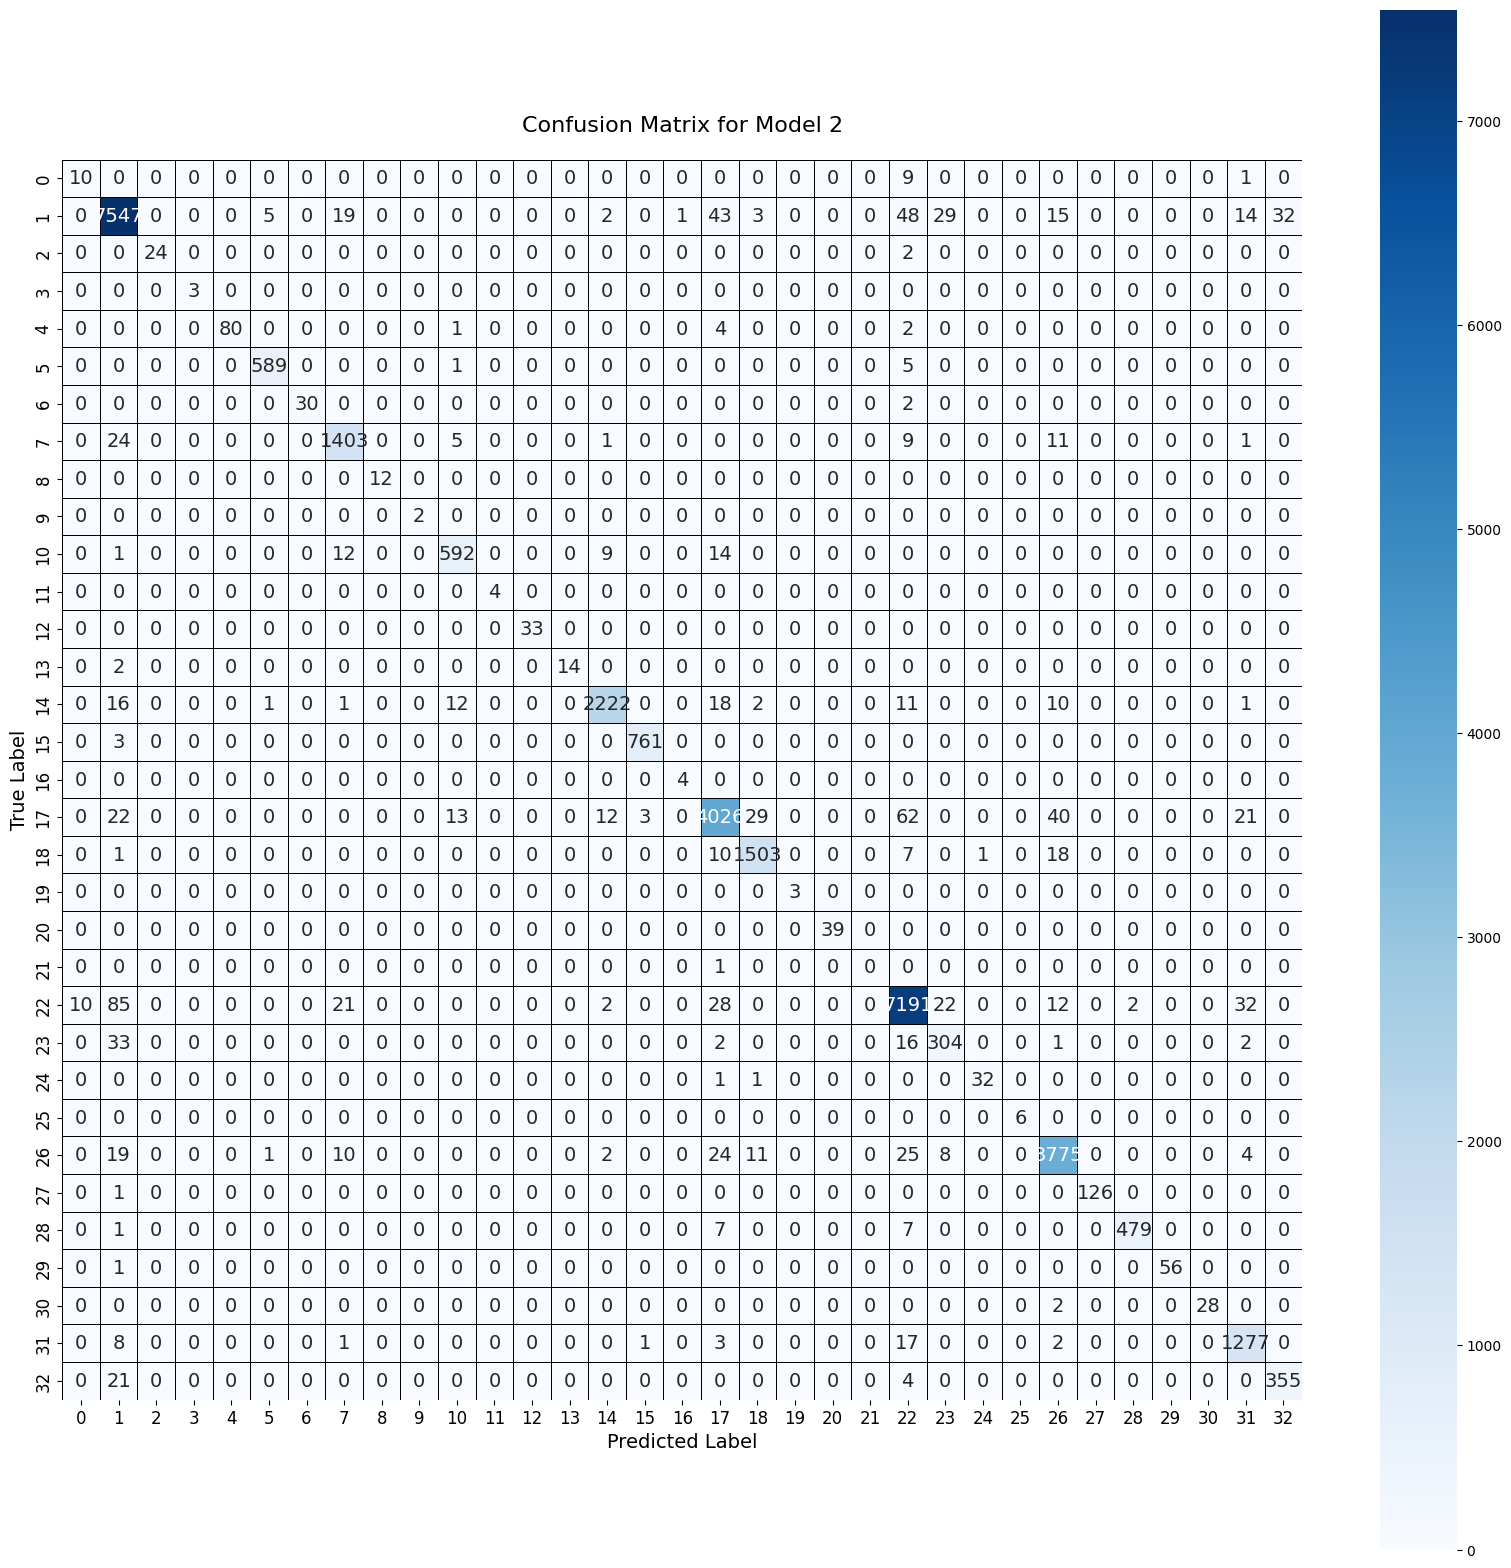

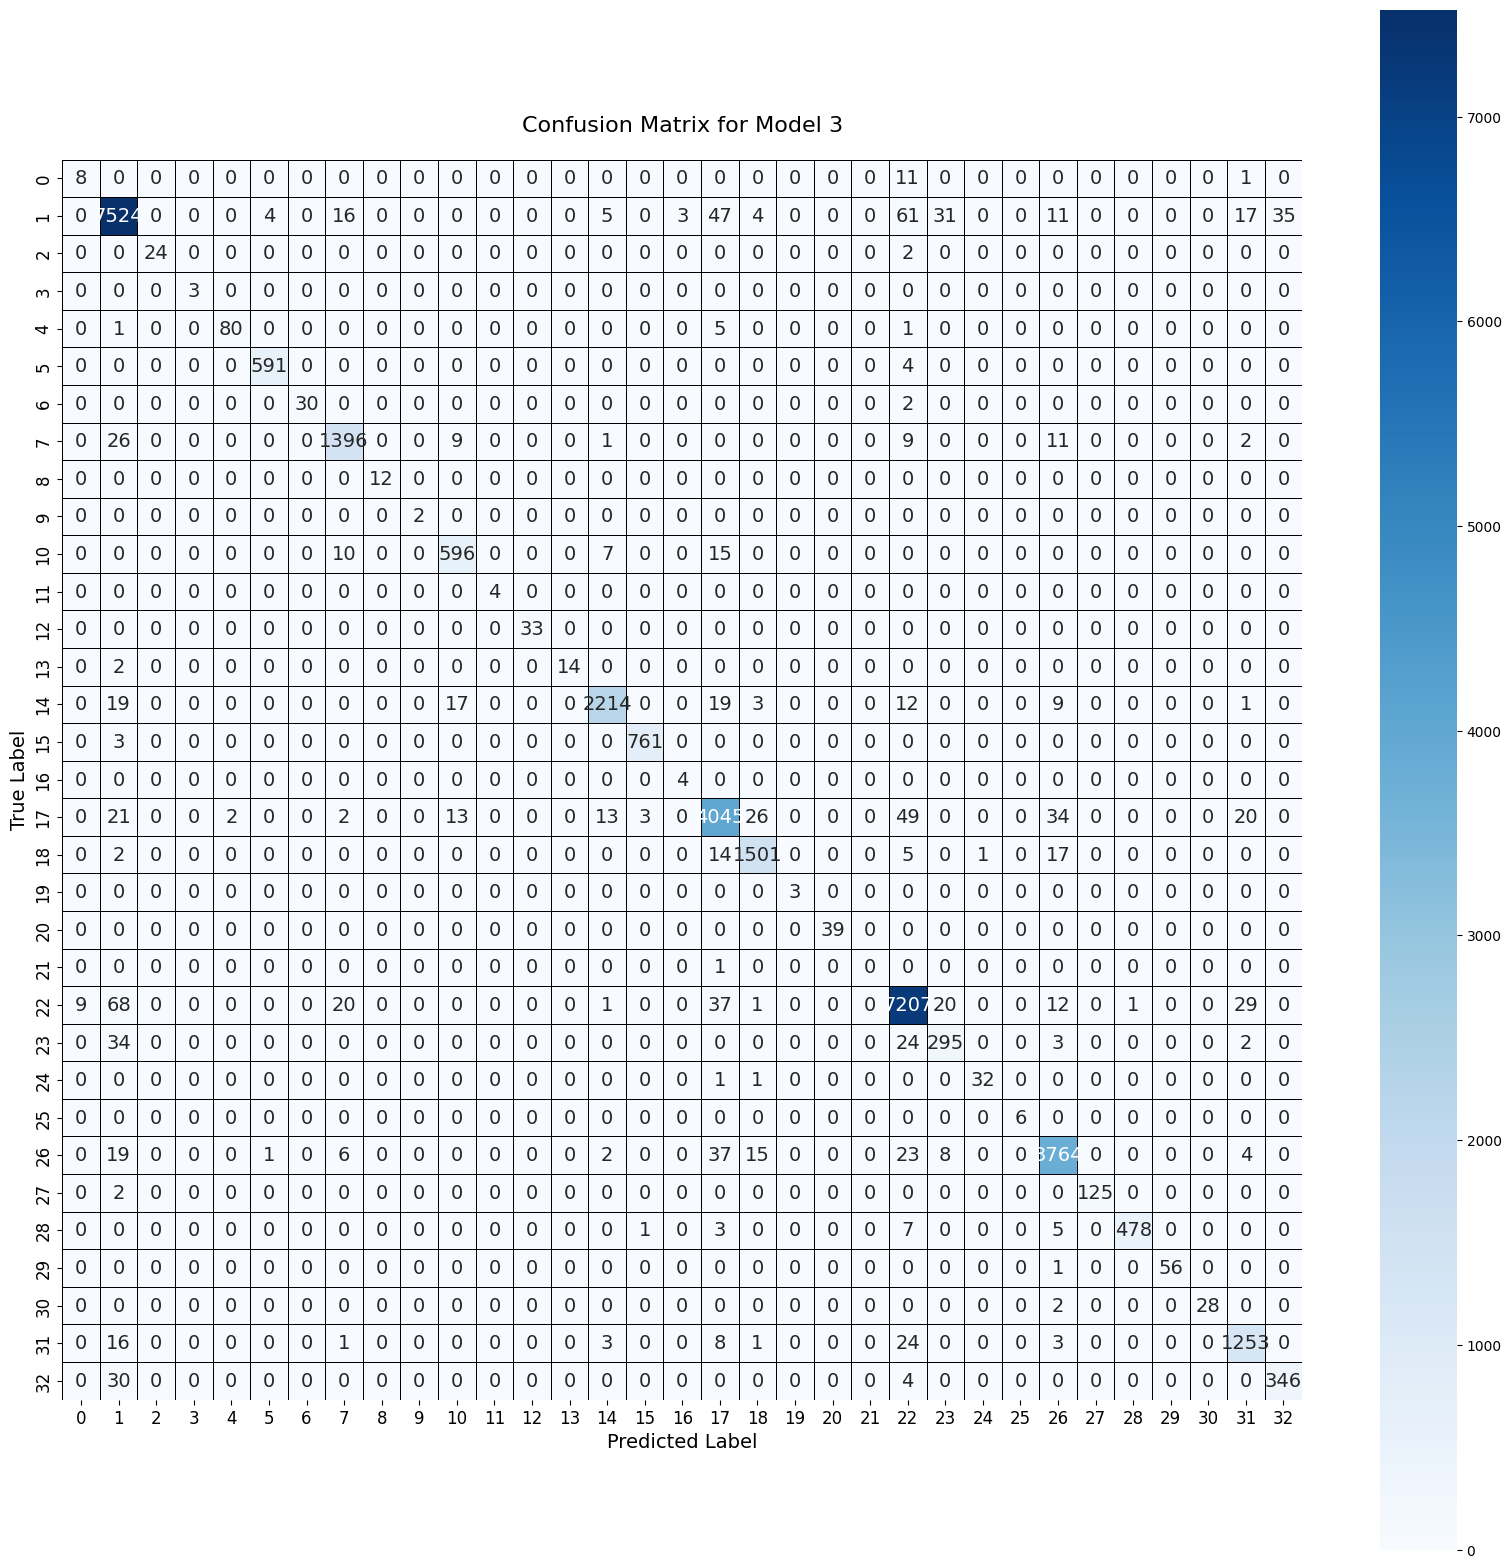

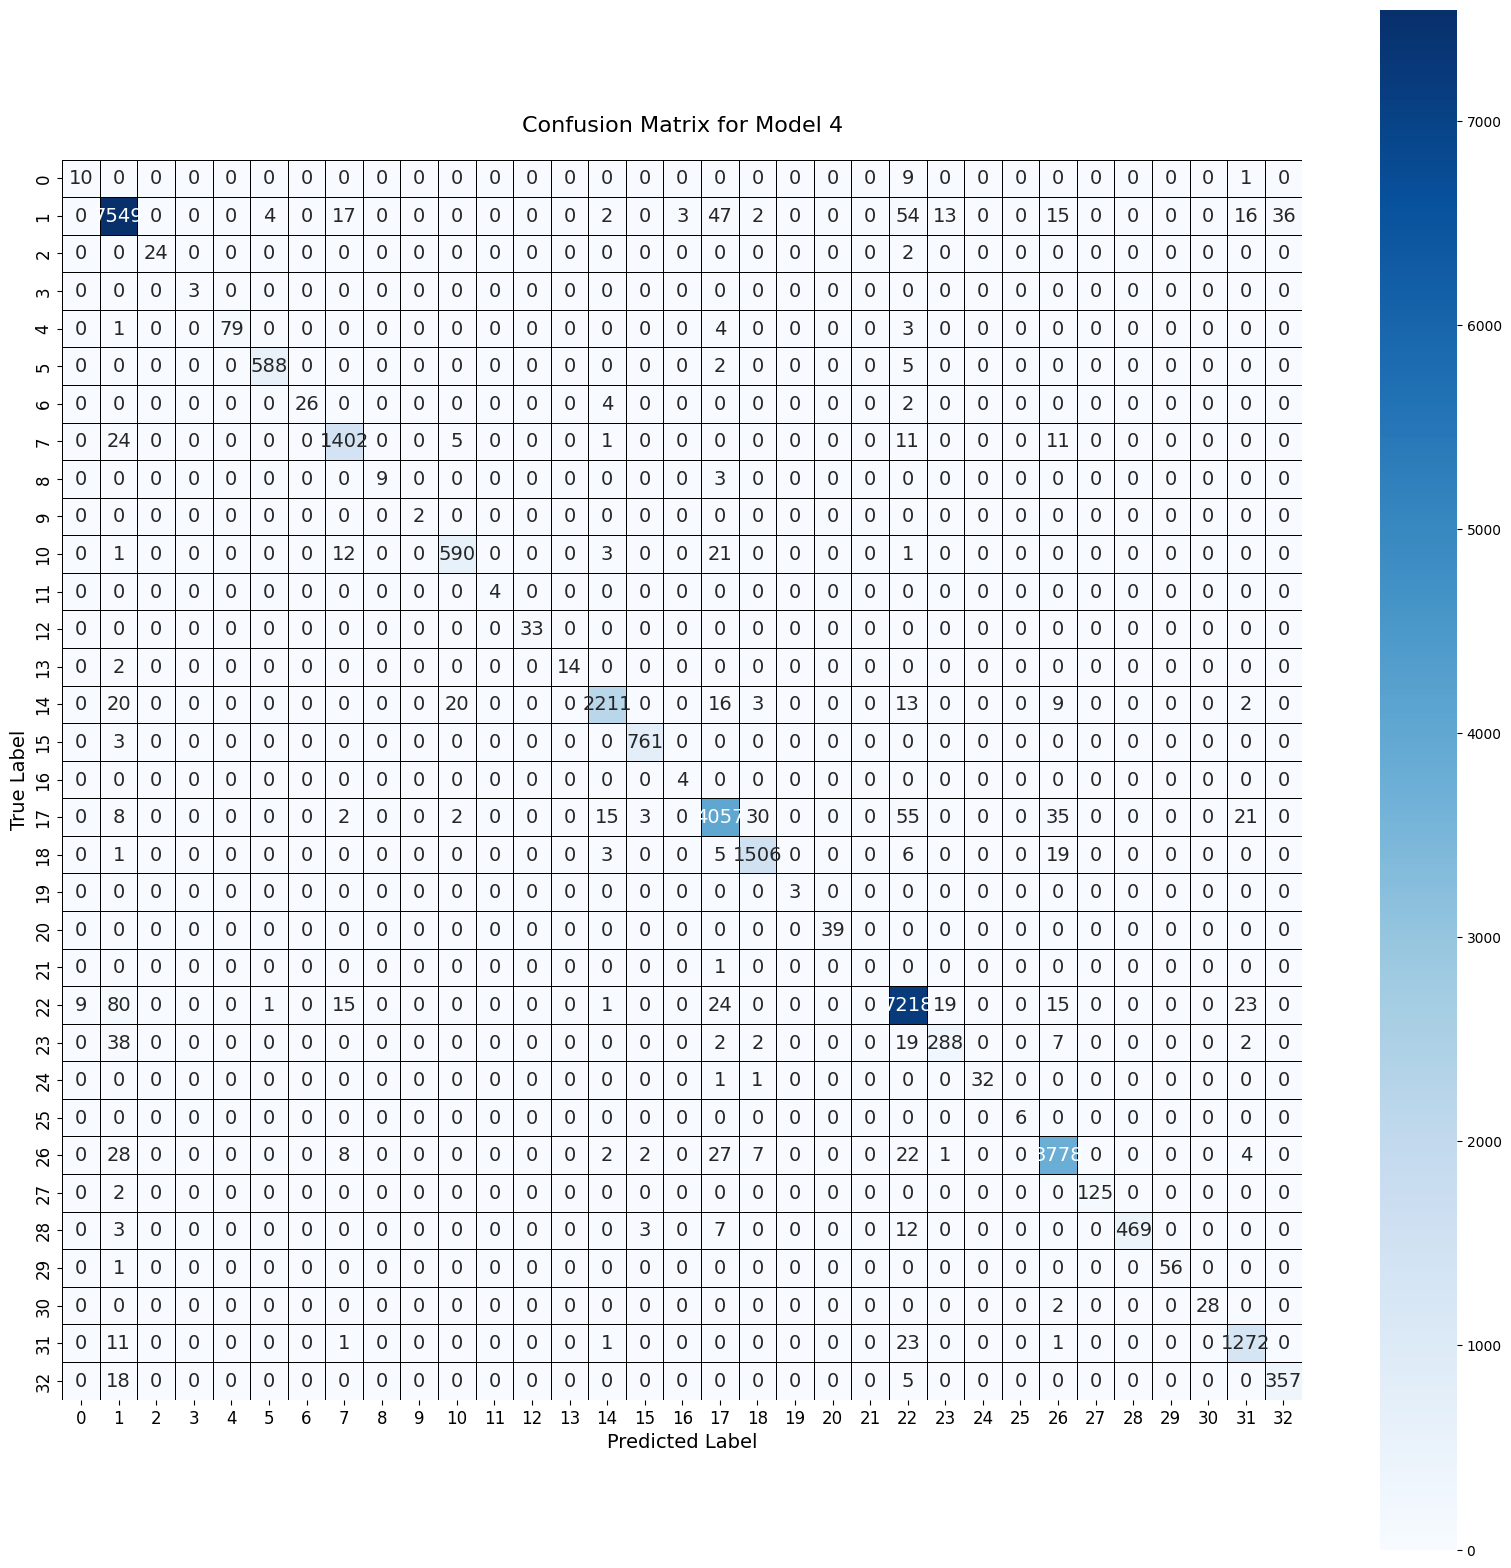

In [26]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Function to plot confusion matrix using Seaborn
# def plot_confusion_matrix(y_true, y_pred, model_name):
#     # Compute confusion matrix
#     cm = confusion_matrix(y_true, y_pred)
    
#     # Plot confusion matrix as a heatmap
#     plt.figure(figsize=(20, 20))
#     sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=True, linewidths=0.5, linecolor='black',
#                 annot_kws={"size": 14}, square=True)
    
#     # Add title and labels
#     plt.title(f'Confusion Matrix for {model_name}', fontsize=16, pad=20)
#     plt.xlabel('Predicted Label', fontsize=14)
#     plt.ylabel('True Label', fontsize=14)
#     plt.xticks(fontsize=12)
#     plt.yticks(fontsize=12)
    
#     # Show the plot
#     plt.show()
    

# # Plot confusion matrix for each model
# plot_confusion_matrix(y_test, pred1, 'Model 1')
# plot_confusion_matrix(y_test, pred2, 'Model 2')
# plot_confusion_matrix(y_test, pred3, 'Model 3')
# plot_confusion_matrix(y_test, pred4, 'Model 4')

# Dropping some columns

In [19]:
keep_cols = ['ID', 'TargetID', 'SYNONYMS',
             'UNIPROID', 'TARGNAME', 'GENENAME',  
             'FUNCTION', 'BIOCLASS',
             'Disease', 'Accession Number',]
len(keep_cols)

10

In [20]:
X_train_dropped = X_train[keep_cols]
X_test_dropped = X_test[keep_cols]

In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score

print("Model 1: ")
param1 = {'use_label_encoder': False, 'eval_metric': 'mlogloss'} # 0.94986
model1 = XGBClassifier(**param1)
model1.fit(X_train_dropped, y_train)
pred1 = model1.predict(X_test_dropped)
print(accuracy_score(y_test, pred1))
print(f1_score(y_test, pred1, average='weighted'))
print('*'*25)

print("Model 2: ")
param2 = {'max_depth': 10, 'learning_rate': 0.09887667319531757, 'n_estimators': 286,
         'subsample': 0.8818473315577697, 'colsample_bytree': 0.7911835582470869, 
         'gamma': 0.5882283567417588, 'min_child_weight': 1} #  0.96608
model2 = XGBClassifier(**param2)
model2.fit(X_train_dropped, y_train)
pred2 = model2.predict(X_test_dropped)
print(accuracy_score(y_test, pred2))
print(f1_score(y_test, pred2, average='weighted'))
print('*'*25)

print("Model 3: ")
param3 = {'max_depth': 17, 'learning_rate': 0.0663028870385258, 'n_estimators': 409,
          'subsample': 0.9629463287306949, 'colsample_bytree': 0.8300614936416831,
          'gamma': 0.2857062337129327, 'min_child_weight': 3} # 4th submission - 0.96506
model3 = XGBClassifier(**param3)
model3.fit(X_train_dropped, y_train)
pred3 = model3.predict(X_test_dropped)
print(accuracy_score(y_test, pred3))
print(f1_score(y_test, pred3, average='weighted'))
print('*'*25)

print("Model 4: ")
param4 = {'max_depth': 18, 'learning_rate': 0.02554741000702669, 'n_estimators': 418, 
          'subsample': 0.9899632082718985, 'colsample_bytree': 0.8226626583591214, 
          'gamma': 0.9701683008405076, 'min_child_weight': 3}  # 0.965149
model4 = XGBClassifier(**param4)
model4.fit(X_train_dropped, y_train)
pred4 = model4.predict(X_test_dropped)
print(accuracy_score(y_test, pred4))
print(f1_score(y_test, pred4, average='weighted'))

Model 1: 
0.9641306287549819
0.9642166995637185
*************************
Model 2: 
0.9723692820177265
0.9724800759385898
*************************
Model 3: 
0.972755933614895
0.9727807198924886
*************************
Model 4: 
0.9698709178514068
0.9698399703229701


# Trying params of CatBoost which is parallely running

## Without Dropping

In [33]:
import catboost as cb
model = cb.CatBoostClassifier()

model.fit(X_train, y_train, silent=True)
pred = model.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, pred))
print("Accuracy Score : ", f1_score(y_test, pred, average='weighted'))

Accuracy Score :  0.9410802450776278
Accuracy Score :  0.9412308139713775


In [37]:
import catboost as cb
params = {'iterations': 374, 'depth': 10, 'learning_rate': 0.47497302209777004, 'l2_leaf_reg': 2.8493972804552454}
model = cb.CatBoostClassifier(**params)

model.fit(X_train, y_train, silent=True)
pred = model.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, pred))
print("Accuracy Score : ", f1_score(y_test, pred, average='weighted'))

Accuracy Score :  0.9833442388912021
Accuracy Score :  0.9834097505034145


In [14]:
from sklearn.metrics import accuracy_score, f1_score
import catboost as cb
params = {'iterations': 668, 'depth': 10, 'learning_rate': 0.13252743506407938, 'l2_leaf_reg': 1.324549870234936}
model = cb.CatBoostClassifier(**params)

model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, pred))
print("Accuracy Score : ", f1_score(y_test, pred, average='weighted'))

## With Dropping

In [36]:
import catboost as cb
model = cb.CatBoostClassifier()

model.fit(X_train_dropped, y_train, silent=True)
pred = model.predict(X_test_dropped)
print("Accuracy Score : ", accuracy_score(y_test, pred))
print("Accuracy Score : ", f1_score(y_test, pred, average='weighted'))

Accuracy Score :  0.9493188983403724
Accuracy Score :  0.949498060015473


In [21]:
import catboost as cb
params = {'iterations': 374, 'depth': 10, 'learning_rate': 0.47497302209777004, 'l2_leaf_reg': 2.8493972804552454}
model = cb.CatBoostClassifier(**params)

model.fit(X_train_dropped, y_train)
pred = model.predict(X_test_dropped)
print("Accuracy Score : ", accuracy_score(y_test, pred))
print("Accuracy Score : ", f1_score(y_test, pred, average='weighted'))

0:	learn: 2.2209296	total: 1.91s	remaining: 11m 52s
1:	learn: 1.9729760	total: 3.78s	remaining: 11m 43s
2:	learn: 3.3859772	total: 5.71s	remaining: 11m 45s
3:	learn: 3.6289392	total: 7.57s	remaining: 11m 40s
4:	learn: 5.5567686	total: 9.45s	remaining: 11m 37s
5:	learn: 2.9646120	total: 11.3s	remaining: 11m 34s
6:	learn: 4.7639779	total: 13.2s	remaining: 11m 32s
7:	learn: 2.8271926	total: 15.1s	remaining: 11m 31s
8:	learn: 2.6293867	total: 17s	remaining: 11m 28s
9:	learn: 3.2758034	total: 18.9s	remaining: 11m 26s
10:	learn: 3.4429348	total: 21s	remaining: 11m 34s
11:	learn: 2.5387175	total: 22.9s	remaining: 11m 31s
12:	learn: 2.4992829	total: 24.8s	remaining: 11m 29s
13:	learn: 3.0507927	total: 26.7s	remaining: 11m 27s
14:	learn: 2.9352283	total: 28.6s	remaining: 11m 24s
15:	learn: 2.4701272	total: 30.5s	remaining: 11m 22s
16:	learn: 4.0498189	total: 32.4s	remaining: 11m 19s
17:	learn: 2.8686809	total: 34.3s	remaining: 11m 17s
18:	learn: 3.4300309	total: 36.2s	remaining: 11m 15s
19:	lea

In [22]:
import catboost as cb
params = {'iterations': 668, 'depth': 10, 'learning_rate': 0.13252743506407938, 'l2_leaf_reg': 1.324549870234936}
model = cb.CatBoostClassifier(**params)

model.fit(X_train_dropped, y_train)
pred = model.predict(X_test_dropped)
print("Accuracy Score : ", accuracy_score(y_test, pred))
print("Accuracy Score : ", f1_score(y_test, pred, average='weighted'))

0:	learn: 2.7194481	total: 1.89s	remaining: 21m 2s
1:	learn: 2.4184078	total: 3.76s	remaining: 20m 52s
2:	learn: 2.2282972	total: 5.64s	remaining: 20m 50s
3:	learn: 2.0747609	total: 7.5s	remaining: 20m 44s
4:	learn: 1.9549240	total: 9.34s	remaining: 20m 39s
5:	learn: 1.8501671	total: 11.2s	remaining: 20m 38s
6:	learn: 1.7581124	total: 13.1s	remaining: 20m 35s
7:	learn: 1.6917032	total: 15s	remaining: 20m 35s
8:	learn: 1.6328603	total: 16.8s	remaining: 20m 33s
9:	learn: 1.5666293	total: 18.7s	remaining: 20m 30s
10:	learn: 1.5017489	total: 20.6s	remaining: 20m 28s
11:	learn: 1.4614758	total: 22.4s	remaining: 20m 25s
12:	learn: 1.4217387	total: 24.3s	remaining: 20m 22s
13:	learn: 1.3852892	total: 26.2s	remaining: 20m 22s
14:	learn: 1.3472837	total: 28s	remaining: 20m 19s
15:	learn: 1.3155185	total: 30s	remaining: 20m 23s
16:	learn: 1.2841979	total: 32s	remaining: 20m 25s
17:	learn: 1.2532552	total: 33.9s	remaining: 20m 23s
18:	learn: 1.2317735	total: 35.8s	remaining: 20m 21s
19:	learn: 1.

# FE or FE

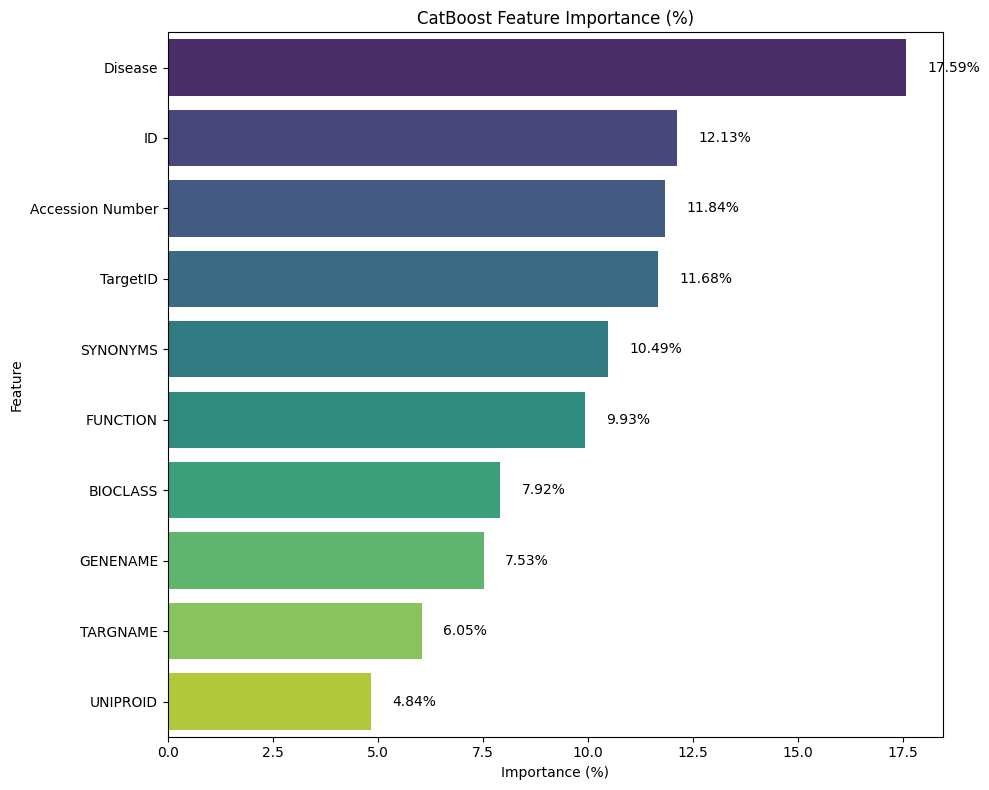

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the model
feature_importances = model.get_feature_importance()
feature_names = X_train_dropped.columns  # Assuming X_train is a DataFrame

# Calculate percentage of feature importance
feature_importances_percent = 100 * (feature_importances / feature_importances.sum())

# Combine feature importance with their names
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_percent
})

# Sort the dataframe by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# Add annotations to each bar
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

# Add title and labels
plt.title('CatBoost Feature Importance (%)')
plt.xlabel('Importance (%)')
plt.ylabel('Feature')

# Show plot
plt.tight_layout()
plt.show()

In [26]:
import catboost as cb
params = {'iterations': 998, 'depth': 9, 'learning_rate': 0.1802477966038792, 'l2_leaf_reg': 0.21068897934661723}
model = cb.CatBoostClassifier(**params)

model.fit(X_train_dropped, y_train)
pred = model.predict(X_test_dropped)
print("Accuracy Score : ", accuracy_score(y_test, pred))
print("F1 Score : ", f1_score(y_test, pred, average='weighted'))

0:	learn: 2.5009488	total: 1.11s	remaining: 18m 31s
1:	learn: 2.2292050	total: 2.26s	remaining: 18m 46s
2:	learn: 1.9984949	total: 3.37s	remaining: 18m 37s
3:	learn: 1.8671418	total: 4.7s	remaining: 19m 29s
4:	learn: 1.7655057	total: 5.95s	remaining: 19m 40s
5:	learn: 1.6909865	total: 7.03s	remaining: 19m 21s
6:	learn: 1.6094174	total: 8.12s	remaining: 19m 8s
7:	learn: 1.5480862	total: 9.2s	remaining: 18m 58s
8:	learn: 1.4747360	total: 10.3s	remaining: 18m 50s
9:	learn: 1.4195661	total: 11.4s	remaining: 18m 45s
10:	learn: 1.3720114	total: 12.5s	remaining: 18m 41s
11:	learn: 1.3287838	total: 13.6s	remaining: 18m 37s
12:	learn: 1.2944109	total: 14.7s	remaining: 18m 33s
13:	learn: 1.2611576	total: 15.8s	remaining: 18m 29s
14:	learn: 1.2296994	total: 16.9s	remaining: 18m 25s
15:	learn: 1.2088822	total: 18s	remaining: 18m 22s
16:	learn: 1.1830382	total: 19.1s	remaining: 18m 19s
17:	learn: 1.1629544	total: 20.2s	remaining: 18m 17s
18:	learn: 1.1377670	total: 21.2s	remaining: 18m 14s
19:	lear

In [36]:
import catboost as cb
params = {'iterations': 951, 'depth': 9, 'learning_rate': 0.18509019397073728, 'l2_leaf_reg': 0.12336456448381483}

model = cb.CatBoostClassifier(**params)

model.fit(X_train_dropped, y_train)
pred = model.predict(X_test_dropped)
print("Accuracy Score : ", accuracy_score(y_test, pred))
print("F1 Score : ", f1_score(y_test, pred, average='weighted'))

0:	learn: 2.4778744	total: 1.1s	remaining: 17m 29s
1:	learn: 2.2062633	total: 2.2s	remaining: 17m 23s
2:	learn: 2.0199648	total: 3.29s	remaining: 17m 19s
3:	learn: 1.9038498	total: 4.38s	remaining: 17m 16s
4:	learn: 1.7806023	total: 5.47s	remaining: 17m 14s
5:	learn: 1.7110682	total: 6.56s	remaining: 17m 12s
6:	learn: 1.6461281	total: 7.65s	remaining: 17m 11s
7:	learn: 1.5787907	total: 8.82s	remaining: 17m 19s
8:	learn: 1.5100353	total: 10.2s	remaining: 17m 45s
9:	learn: 1.4545667	total: 11.3s	remaining: 17m 44s
10:	learn: 1.4087537	total: 12.4s	remaining: 17m 40s
11:	learn: 1.3671525	total: 13.5s	remaining: 17m 35s
12:	learn: 1.3272389	total: 14.6s	remaining: 17m 31s
13:	learn: 1.2906485	total: 15.7s	remaining: 17m 28s
14:	learn: 1.2586329	total: 16.8s	remaining: 17m 25s
15:	learn: 1.2191258	total: 17.8s	remaining: 17m 22s
16:	learn: 1.1929810	total: 18.9s	remaining: 17m 19s
17:	learn: 1.1729523	total: 20s	remaining: 17m 17s
18:	learn: 1.1520727	total: 21.1s	remaining: 17m 16s
19:	lea

In [41]:
X_train.head()

,ID,TargetID,DRUGID,DRUGTYPE,Drug_high_status,DRUGNAME,PUBCHCID,Disease_of_highest_status,Drug_Status,UNIPROID,TARGNAME,GENENAME,SYNONYMS,FUNCTION,BIOCLASS,SEQUENCE,Disease,Accession Number
88082,131977,397,1733,4,0,808,146,487,1,511,499,549,293,143,72,593,271,253
36973,189122,492,2209,4,0,2069,975,434,17,252,228,250,447,661,58,452,260,362
76161,112276,177,1108,4,0,1071,358,607,12,396,389,1,248,176,0,157,515,128
5088,78657,424,1389,4,0,2322,1169,590,1,681,660,249,565,364,58,669,155,220
76923,39756,13,2280,4,0,375,509,573,1,202,186,200,59,171,45,109,384,355


# Predictions on test data

In [27]:
train = pd.read_csv('/kaggle/input/nexus-by-djs-nsdc-ultraceuticals/train.csv')
train.head()

,ID,TargetID,DRUGID,DRUGTYPE,Drug_high_status,DRUGNAME,PUBCHCID,Disease_of_highest_status,Drug_Status,UNIPROID,TARGNAME,GENENAME,SYNONYMS,FUNCTION,BIOCLASS,SEQUENCE,Disease,Accession Number,Target_Status
0,140736,T51115,D0L4YD,Small molecular drug,Approved,Solifenacin,154059,Overactive bladder,Approved,CAC1C_HUMAN,Voltage-gated calcium channel alpha Cav1.2 (CA...,CACNA1C,Voltage-gated calcium channel subunit alpha Ca...,Mediates influx of calcium ions into the cytop...,Voltage-gated ion channel,MVNENTRMYIPEENHQGSNYGSPRPAHANMNANAAAGLAPEHIPTP...,Genetic cardiac arrhythmia,Q13936,Terminated
1,133048,T60529,D03NMM,Small molecular drug,Investigative,AM-643,46843035,Dermatological disease,Investigative,PGH1_HUMAN,Prostaglandin G/H synthase 1 (COX-1),PTGS1,Prostaglandin-endoperoxide synthase 1; Prostag...,Converts arachidonate to prostaglandin H2 (PGH...,Paired donor oxygen oxidoreductase,MSRSLLLWFLLFLLLLPPLPVLLADPGAPTPVNPCCYYPCQHQGIC...,Rheumatoid arthritis,P23219,Approved
2,60493,T80975,D0T2ER,Small molecular drug,Phase 1,TAK-593,24767976,Solid tumour/cancer,Phase 1,VGFR2_HUMAN,Vascular endothelial growth factor receptor 2 ...,KDR,VEGFR2; VEGFR-2; VEGF-2 receptor; Protein-tyro...,Plays an essential role in the regulation of a...,Kinase,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,Renal cell carcinoma,P35968,Approved
3,169176,T92072,D07ESH,Small molecular drug,Discontinued in Phase 3,PF-1913539,176408,Alzheimer disease,Discontinued in Phase 3,AA1R_HUMAN,Adenosine A1 receptor (ADORA1),ADORA1,Adenosine receptor A1; A(1) adenosine receptor,The activity of this receptor is mediated by G...,GPCR rhodopsin,MPPSISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,Hyper-lipoproteinaemia,P30542,Phase 2
4,120183,T30082,D0Q0RC,Small molecular drug,Approved,Ethopropazine,3290,Parkinson disease,Approved,ACES_HUMAN,Acetylcholinesterase (AChE),ACHE,YT; N-ACHE; ARACHE,Role in neuronal apoptosis. Terminates signal ...,Carboxylic ester hydrolase,MRPPQCLLHTPSLASPLLLLLLWLLGGGVGAEGREDAELLVTVRGG...,Oesophageal/gastroduodenal disorder,P22303,Approved


In [28]:
test = pd.read_csv('/kaggle/input/nexus-by-djs-nsdc-ultraceuticals/test.csv')
test.head()

,ID,TargetID,DRUGID,DRUGTYPE,Drug_high_status,DRUGNAME,PUBCHCID,Disease_of_highest_status,Drug_Status,UNIPROID,TARGNAME,GENENAME,SYNONYMS,FUNCTION,BIOCLASS,SEQUENCE,Disease,Accession Number
0,1076,T51487,D0HO2T,Small molecular drug,Phase 2,AZD7325,23581869,Anxiety disorder,Phase 2,GBRA1_HUMAN,GABA(A) receptor alpha-1 (GABRA1),GABRA1,Gamma-aminobutyric acid receptor subunit alpha...,Ligand-gated chloride channel which is a compo...,Ligand-gated ion channel,MRKSPGLSDCLWAWILLLSTLTGRSYGQPSLQDELKDNTTVFTRIL...,Malaria,P14867
1,190816,T74312,D0Q4EQ,Small molecular drug,Investigative,JNJ-38158471,16742063,Angiogenesis disorder,Investigative,FLT3_HUMAN,Fms-like tyrosine kinase 3 (FLT-3),FLT3,Stem cell tyrosine kinase 1; STK1; STK-1; Rece...,Tyrosine-protein kinase that acts as cell-surf...,Kinase,MPALARDGGQLPLLVVFSAMIFGTITNQDLPVIKCVLINHKNNDSS...,Malignant haematopoietic neoplasm,P36888
2,180551,T40474,D0R0MW,Small molecular drug,Approved,Sunitinib,5329102,Gastrointestinal stromal tumour,Approved,MET_HUMAN,Proto-oncogene c-Met (MET),MET,Tyrosine-protein kinase Met; Scatter factor re...,Regulates many physiological processes includi...,Kinase,MKAPAVLAPGILVLLFTLVQRSNGECKEALAKSEMNVNMKYQLPNF...,Liver cancer,Q86W50
3,51630,T67162,D0T2XU,Small molecular drug,Approved,Promethazine,4927,Nausea,Approved,DRD2_HUMAN,Dopamine D2 receptor (D2R),DRD2,Dopamine receptor 2; D(2) dopamine receptor,Dopamine receptor whose activity is mediated b...,GPCR rhodopsin,MDPLNLSWYDDDLERQNWSRPFNGSDGKADRPHYNYYATLLTLLIA...,Depression,P14416
4,50566,T67162,D0H7KF,Small molecular drug,Approved,Quetiapine,5002,Alcohol dependence,Phase 3,DRD2_HUMAN,Dopamine D2 receptor (D2R),DRD2,Dopamine receptor 2; D(2) dopamine receptor,Dopamine receptor whose activity is mediated b...,GPCR rhodopsin,MDPLNLSWYDDDLERQNWSRPFNGSDGKADRPHYNYYATLLTLLIA...,Lymphoma,P14416


In [29]:
from sklearn.preprocessing import LabelEncoder

for col in le_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1 if pd.notna(x) else -1)
    print("Done for", col)

Done for TargetID
Done for DRUGID
Done for DRUGTYPE
Done for Drug_high_status
Done for DRUGNAME
Done for PUBCHCID
Done for Disease_of_highest_status
Done for Drug_Status
Done for UNIPROID
Done for TARGNAME
Done for GENENAME
Done for SYNONYMS
Done for FUNCTION
Done for BIOCLASS
Done for SEQUENCE
Done for Disease
Done for Accession Number


In [30]:
le = LabelEncoder()
train['Target_Status'] = le.fit_transform(train['Target_Status'])
# y_test = le.transform(y_test)
print(le.classes_)

['Application submitted' 'Approved' 'Approved (orphan drug)'
 'BLA submitted' 'Clinical trial' 'Discontinued in Phase 1'
 'Discontinued in Phase 1/2' 'Discontinued in Phase 2'
 'Discontinued in Phase 2/3' 'Discontinued in Phase 2b'
 'Discontinued in Phase 3' 'Discontinued in Phase 4'
 'Discontinued in Preregistration' 'IND submitted' 'Investigative'
 'Patented' 'Phase 0' 'Phase 1' 'Phase 1/2' 'Phase 1/2a' 'Phase 1b'
 'Phase 1b/2a' 'Phase 2' 'Phase 2/3' 'Phase 2a' 'Phase 2b' 'Phase 3'
 'Phase 4' 'Preclinical' 'Preregistration' 'Registered' 'Terminated'
 'Withdrawn from market']


In [31]:
train_dropped = train[keep_cols]
y = train['Target_Status']
test_dropped = test[keep_cols]

In [32]:
train_dropped.head(), test_dropped.head(), y[:5]

(       ID  TargetID  SYNONYMS  UNIPROID  TARGNAME  GENENAME  FUNCTION  \
 0  140736       332       583       102       676        92       376   
 1  133048       402       296       516       505       554       145   
 2   60493       547       564       689       668       371       435   
 3  169176       636         7        16        24        17       604   
 4  120183       210       603        26        19         9       557   
 
    BIOCLASS  Disease  Accession Number  
 0       101      220               547  
 1        72      487               256  
 2        58      479               363  
 3        45      248               316  
 4        28      407               249  ,
        ID  TargetID  SYNONYMS  UNIPROID  TARGNAME  GENENAME  FUNCTION  \
 0    1076       339        91       265       245       262       335   
 1  190816       498       452       254       232       253       667   
 2  180551       272       538       401       524       412       523   
 3   

In [33]:
# Define the list of categories in the order you want to encode them
categories = [
    'Application submitted', 'Approved', 'Approved (orphan drug)', 'BLA submitted', 'Clinical trial',
    'Discontinued in Phase 1', 'Discontinued in Phase 1/2', 'Discontinued in Phase 2', 'Discontinued in Phase 2/3',
    'Discontinued in Phase 2b', 'Discontinued in Phase 3', 'Discontinued in Phase 4',
    'Discontinued in Preregistration', 'IND submitted', 'Investigative', 'Patented', 'Phase 0', 'Phase 1', 'Phase 1/2',
    'Phase 1/2a', 'Phase 1b', 'Phase 1b/2a', 'Phase 2', 'Phase 2/3', 'Phase 2a', 'Phase 2b', 'Phase 3', 'Phase 4',
    'Preclinical', 'Preregistration', 'Registered', 'Terminated', 'Withdrawn from market'
]

# Create a dictionary mapping each category to its corresponding label (0, 1, 2, etc.)
category_to_label = {idx : category for idx, category in enumerate(categories)}

# Function to apply the mapping
# def map_to_label(value):
#     return category_to_label.get(value, 1)  # Returns 1 if the value is not found in the dictionary
category_to_label

{0: 'Application submitted',
 1: 'Approved',
 2: 'Approved (orphan drug)',
 3: 'BLA submitted',
 4: 'Clinical trial',
 5: 'Discontinued in Phase 1',
 6: 'Discontinued in Phase 1/2',
 7: 'Discontinued in Phase 2',
 8: 'Discontinued in Phase 2/3',
 9: 'Discontinued in Phase 2b',
 10: 'Discontinued in Phase 3',
 11: 'Discontinued in Phase 4',
 12: 'Discontinued in Preregistration',
 13: 'IND submitted',
 14: 'Investigative',
 15: 'Patented',
 16: 'Phase 0',
 17: 'Phase 1',
 18: 'Phase 1/2',
 19: 'Phase 1/2a',
 20: 'Phase 1b',
 21: 'Phase 1b/2a',
 22: 'Phase 2',
 23: 'Phase 2/3',
 24: 'Phase 2a',
 25: 'Phase 2b',
 26: 'Phase 3',
 27: 'Phase 4',
 28: 'Preclinical',
 29: 'Preregistration',
 30: 'Registered',
 31: 'Terminated',
 32: 'Withdrawn from market'}

In [34]:
import catboost as cb
params = {'iterations': 998, 'depth': 9, 'learning_rate': 0.1802477966038792, 'l2_leaf_reg': 0.21068897934661723}
model = cb.CatBoostClassifier(**params)

print('Predicting.....')

model.fit(train_dropped, y)
pred = model.predict(test_dropped)

sub = pd.DataFrame(test['ID'])
sub['Prediction'] = pred

sub['Prediction'] = sub['Prediction'].map(category_to_label)

sub.to_csv('CatBoost_model_.csv', index=False)
sub.head()

Predicting.....
0:	learn: 2.4649175	total: 1.33s	remaining: 22m 8s
1:	learn: 2.2244577	total: 2.63s	remaining: 21m 49s
2:	learn: 2.0206757	total: 3.98s	remaining: 21m 58s
3:	learn: 1.8957088	total: 5.28s	remaining: 21m 51s
4:	learn: 1.7757877	total: 6.58s	remaining: 21m 47s
5:	learn: 1.6975813	total: 7.89s	remaining: 21m 44s
6:	learn: 1.6264577	total: 9.18s	remaining: 21m 40s
7:	learn: 1.5654373	total: 10.5s	remaining: 21m 36s
8:	learn: 1.5099430	total: 11.8s	remaining: 21m 33s
9:	learn: 1.4640647	total: 13.1s	remaining: 21m 31s
10:	learn: 1.4156588	total: 14.4s	remaining: 21m 31s
11:	learn: 1.3747898	total: 15.7s	remaining: 21m 31s
12:	learn: 1.3413055	total: 17s	remaining: 21m 28s
13:	learn: 1.3050531	total: 18.3s	remaining: 21m 27s
14:	learn: 1.2809594	total: 19.6s	remaining: 21m 25s
15:	learn: 1.2642073	total: 21s	remaining: 21m 25s
16:	learn: 1.2269341	total: 22.5s	remaining: 21m 38s
17:	learn: 1.2100598	total: 23.9s	remaining: 21m 41s
18:	learn: 1.1822693	total: 25.2s	remaining: 

,ID,Prediction
0,1076,Approved
1,190816,Phase 3
2,180551,Phase 3
3,51630,Approved
4,50566,Phase 1/2


In [35]:
print("Done!")

Done!


In [37]:
import catboost as cb
params = {'iterations': 951, 'depth': 9, 'learning_rate': 0.18509019397073728, 'l2_leaf_reg': 0.12336456448381483}
model = cb.CatBoostClassifier(**params)

print('Predicting.....')

model.fit(train_dropped, y)
pred = model.predict(test_dropped)

sub = pd.DataFrame(test['ID'])
sub['Prediction'] = pred

sub['Prediction'] = sub['Prediction'].map(category_to_label)

sub.to_csv('CatBoost_model_2.csv', index=False)
sub.head()

Predicting.....
0:	learn: 2.4424411	total: 1.33s	remaining: 21m 2s
1:	learn: 2.1963837	total: 2.64s	remaining: 20m 51s
2:	learn: 1.9817590	total: 3.94s	remaining: 20m 43s
3:	learn: 1.8505373	total: 5.23s	remaining: 20m 38s
4:	learn: 1.7446642	total: 6.53s	remaining: 20m 36s
5:	learn: 1.6702612	total: 7.83s	remaining: 20m 33s
6:	learn: 1.5976727	total: 9.14s	remaining: 20m 32s
7:	learn: 1.5383771	total: 10.5s	remaining: 20m 33s
8:	learn: 1.4718902	total: 11.8s	remaining: 20m 31s
9:	learn: 1.4256056	total: 13.1s	remaining: 20m 29s
10:	learn: 1.3900433	total: 14.4s	remaining: 20m 27s
11:	learn: 1.3489866	total: 15.7s	remaining: 20m 29s
12:	learn: 1.3165100	total: 17s	remaining: 20m 26s
13:	learn: 1.2823848	total: 18.3s	remaining: 20m 24s
14:	learn: 1.2593868	total: 19.6s	remaining: 20m 24s
15:	learn: 1.2359950	total: 20.9s	remaining: 20m 23s
16:	learn: 1.1971575	total: 22.2s	remaining: 20m 22s
17:	learn: 1.1766593	total: 23.5s	remaining: 20m 19s
18:	learn: 1.1495058	total: 24.9s	remaining

,ID,Prediction
0,1076,Approved
1,190816,Phase 3
2,180551,Phase 3
3,51630,Approved
4,50566,Phase 1/2
